In [1]:
import keras
from keras.layers import Conv2D, MaxPool2D, LeakyReLU, Input, Add, BatchNormalization, GlobalMaxPooling2D,Dense

Using TensorFlow backend.
/home/matthias/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/matthias/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/matthias/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/matthias/.local/lib/python3.6/site-packages/tensorflo

In [38]:
visible = Input(shape=(512,512,3))

int_c = Conv2D(filters = 32, kernel_size = 3, padding= "same")(visible)
int_c = BatchNormalization()(int_c)
int_c = LeakyReLU()(int_c)


conv1 = Conv2D(filters = 64, kernel_size = 7, strides=(2, 2), padding= "same")(int_c)
conv1 = BatchNormalization()(conv1)
conv1 = LeakyReLU()(conv1)

conv2_0 = MaxPool2D(pool_size = 3, strides=(2, 2), padding= "same")(conv1)
conv2_1 = Conv2D(filters = 64, kernel_size = 3, padding= "same")(conv2_0)
conv2_1 = BatchNormalization()(conv2_1)
conv2_1 = LeakyReLU()(conv2_1)

conv2_1 = Conv2D(filters = 64, kernel_size = 3, padding= "same")(conv2_1)
conv2_1 = BatchNormalization()(conv2_1)
conv2_1 = Add()([conv2_0, conv2_1])
conv2_1 = LeakyReLU()(conv2_1)

conv2_2 = Conv2D(filters = 64, kernel_size = 3, padding= "same")(conv2_1)
conv2_2 = BatchNormalization()(conv2_2)
conv2_2 = LeakyReLU()(conv2_2)
conv2_2 = Conv2D(filters = 64, kernel_size = 3, padding= "same")(conv2_2)
conv2_2 = BatchNormalization()(conv2_2)
conv2_2 = Add()([conv2_1, conv2_2])
conv2_2 = LeakyReLU()(conv2_2)

conv2_2_skip = Conv2D(filters = 128, strides=(2, 2),kernel_size = 1)(conv2_2)
conv2_2_skip = BatchNormalization()(conv2_2_skip)

conv3_1 = Conv2D(filters = 128, kernel_size = 3, strides=(2, 2), padding= "same")(conv2_2)
conv3_1 = BatchNormalization()(conv3_1)
conv3_1 = LeakyReLU()(conv3_1)
conv3_1 = Conv2D(filters = 128, kernel_size = 3, padding= "same")(conv3_1)
conv3_1 = BatchNormalization()(conv3_1)
conv3_1 = Add()([conv2_2_skip, conv3_1])
conv3_1 = LeakyReLU()(conv3_1)

conv3_2 = Conv2D(filters = 128, kernel_size = 3, padding= "same")(conv3_1)
conv3_2 = BatchNormalization()(conv3_2)
conv3_2 = LeakyReLU()(conv3_2)
conv3_2 = Conv2D(filters = 128, kernel_size = 3, padding= "same")(conv3_2)
conv3_2 = BatchNormalization()(conv3_2)
conv3_2 = Add()([conv3_1, conv3_2])
conv3_2 = LeakyReLU()(conv3_2)

conv3_2_skip = Conv2D(filters = 256, kernel_size = 3, strides=(2, 2), padding= "same")(conv3_2)
conv3_2_skip = BatchNormalization()(conv3_2_skip)


conv4_1 = Conv2D(filters = 256, kernel_size = 3, strides=(2, 2), padding= "same")(conv3_2)
conv4_1 = BatchNormalization()(conv4_1)
conv4_1 = LeakyReLU()(conv4_1)
conv4_1 = Conv2D(filters = 256, kernel_size = 3, padding= "same")(conv4_1)
conv4_1 = BatchNormalization()(conv4_1)
conv4_1 = Add()([conv3_2_skip, conv4_1])
conv4_1 = LeakyReLU()(conv4_1)

conv4_2 = Conv2D(filters = 256, kernel_size = 3, padding= "same")(conv4_1)
conv4_2 = BatchNormalization()(conv4_2)
conv4_2 = LeakyReLU()(conv4_2)
conv4_2 = Conv2D(filters = 256, kernel_size = 3, padding= "same")(conv4_2)
conv4_2 = BatchNormalization()(conv4_2)
conv4_2 = Add()([conv4_1, conv4_2])
conv4_2 = LeakyReLU()(conv4_2)

conv4_2_skip = Conv2D(filters = 512, kernel_size = 3, strides=(2, 2), padding= "same")(conv4_2)
conv4_2_skip = BatchNormalization()(conv4_2_skip)

conv5_1 = Conv2D(filters = 512, kernel_size = 3, strides=(2, 2), padding= "same")(conv4_2)
conv5_1 = BatchNormalization()(conv5_1)
conv5_1 = LeakyReLU()(conv5_1)
conv5_1 = Conv2D(filters = 512, kernel_size = 3, padding= "same")(conv5_1)
conv5_1 = BatchNormalization()(conv5_1)
conv5_1 = Add()([conv4_2_skip, conv5_1])
conv5_1 = LeakyReLU()(conv5_1)

conv5_2 = Conv2D(filters = 512, kernel_size = 3, padding= "same")(conv5_1)
conv5_2 = BatchNormalization()(conv5_2)
conv5_2 = LeakyReLU()(conv5_2)
conv5_2 = Conv2D(filters = 512, kernel_size = 3, padding= "same")(conv5_2)
conv5_2 = BatchNormalization()(conv5_2)
conv5_2 = Add()([conv5_1, conv5_2])
conv5_2 = LeakyReLU()(conv5_2)


In [43]:
from keras.layers import concatenate, Conv2DTranspose

upconv_1 = Conv2DTranspose(filters = 256,kernel_size = 3, strides = 2,padding= "same")(conv5_2)
upconv_1 = BatchNormalization()(upconv_1)
upconv_1 = LeakyReLU()(upconv_1)
upconv_1 = concatenate([upconv_1, conv4_2])

upconv_1 = Conv2D(filters = 256, kernel_size = 3, padding= "same")(upconv_1)
upconv_1 = BatchNormalization()(upconv_1)
upconv_1 = LeakyReLU()(upconv_1)

upconv_1 = Conv2D(filters = 256, kernel_size = 3, padding= "same")(upconv_1)
upconv_1 = BatchNormalization()(upconv_1)
upconv_1 = LeakyReLU()(upconv_1)

# second upconv

upconv_2 = Conv2DTranspose(filters = 128, kernel_size = 3, strides = 2,padding= "same")(upconv_1)
upconv_2 = BatchNormalization()(upconv_2)
upconv_2 = LeakyReLU()(upconv_2)
upconv_2 = concatenate([upconv_2, conv3_2])

upconv_2 = Conv2D(filters =128, kernel_size = 3, padding= "same")(upconv_2)
upconv_2 = BatchNormalization()(upconv_2)
upconv_2 = LeakyReLU()(upconv_2)

upconv_2 = Conv2D(filters = 128, kernel_size = 3, padding= "same")(upconv_2)
upconv_2 = BatchNormalization()(upconv_2)
upconv_2 = LeakyReLU()(upconv_2)


# third upconv

upconv_3 = Conv2DTranspose(filters = 64, kernel_size = 3, strides = 2, padding= "same")(upconv_2)
upconv_3 = BatchNormalization()(upconv_3)
upconv_3 = LeakyReLU()(upconv_3)
upconv_3 = concatenate([upconv_3, conv2_2])

upconv_3 = Conv2D(filters =64, kernel_size = 3, padding= "same")(upconv_3)
upconv_3 = BatchNormalization()(upconv_3)
upconv_3 = LeakyReLU()(upconv_3)

upconv_3 = Conv2D(filters = 64, kernel_size = 3, padding= "same")(upconv_3)
upconv_3 = BatchNormalization()(upconv_3)
upconv_3 = LeakyReLU()(upconv_3)

# fourth upconv

upconv_4 = Conv2DTranspose(filters = 64, kernel_size = 7, strides = 2, padding= "same")(upconv_3)
upconv_4 = BatchNormalization()(upconv_4)
upconv_4 = LeakyReLU()(upconv_4)
upconv_4 = concatenate([upconv_4, conv1])

upconv_4 = Conv2D(filters =64, kernel_size = 3, padding= "same")(upconv_4)
upconv_4 = BatchNormalization()(upconv_4)
upconv_4 = LeakyReLU()(upconv_4)

upconv_4 = Conv2D(filters = 64, kernel_size = 3, padding= "same")(upconv_4)
upconv_4 = BatchNormalization()(upconv_4)
upconv_4 = LeakyReLU()(upconv_4)

# fifth upconv

upconv_5 = Conv2DTranspose(filters = 32, kernel_size = 3, strides = 2, padding= "same")(upconv_4)
upconv_5 = BatchNormalization()(upconv_5)
upconv_5 = LeakyReLU()(upconv_5)
upconv_5 = concatenate([upconv_5, int_c])

upconv_5 = Conv2D(filters =32, kernel_size = 3, padding= "same")(upconv_5)
upconv_5 = BatchNormalization()(upconv_5)
upconv_5 = LeakyReLU()(upconv_5)

upconv_5 = Conv2D(filters = 1, kernel_size = 3, padding= "same")(upconv_5)
upconv_5 = BatchNormalization()(upconv_5)
upconv_5 = LeakyReLU()(upconv_5)

In [44]:
from keras.models import Model
from keras.utils import plot_model
model = Model(inputs=visible, outputs=upconv_5)

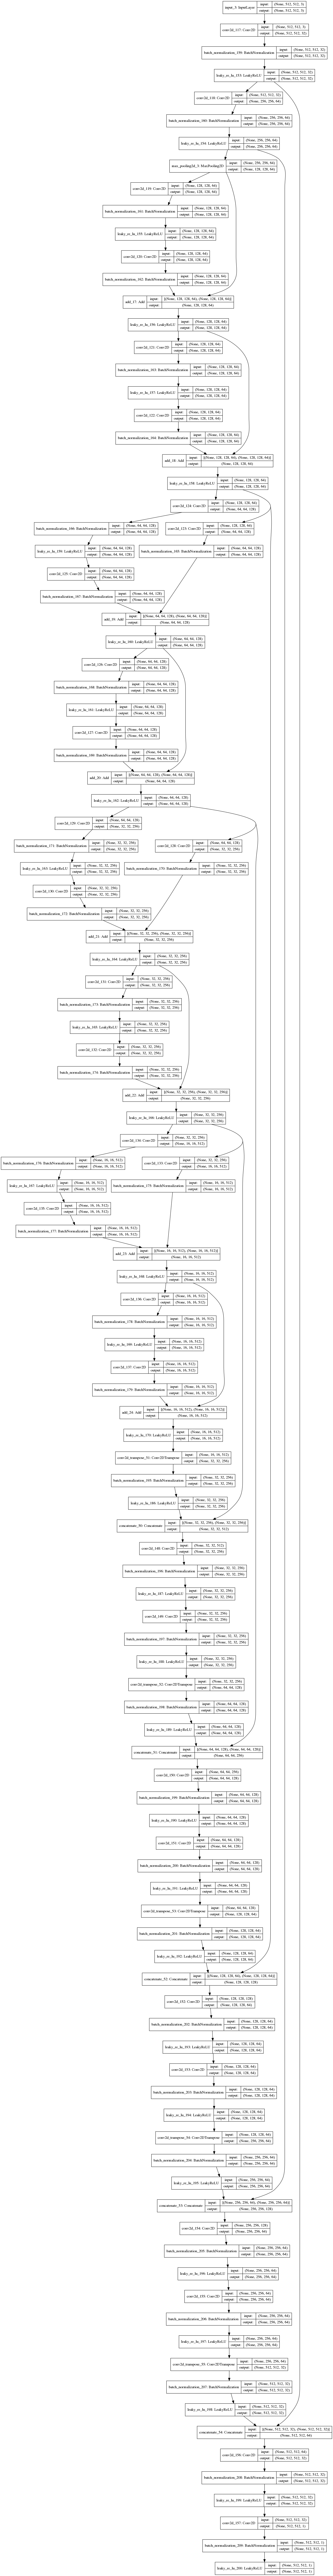

In [45]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [46]:
model.summary()

Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 512, 512, 3)  0                                            
__________________________________________________________________________________________________
conv2d_117 (Conv2D)             (None, 512, 512, 32) 896         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_159 (BatchN (None, 512, 512, 32) 128         conv2d_117[0][0]                 
__________________________________________________________________________________________________
leaky_re_lu_153 (LeakyReLU)     (None, 512, 512, 32) 0           batch_normalization_159[0][0]    
____________________________________________________________________________________________